### 군집을 나누고 군집별 주요기준들에 대한 수치확인ㄴ

In [3]:


import pandas as pd
raw_df1 = pd.read_csv('Data1_전처리및212223인구.csv', encoding='UTF-8') ## 인코딩 설정하지 않으면 에러 발생
raw_df2 = pd.read_csv('Data2_전처리.csv', encoding='UTF-8') 
raw_df3 = pd.read_csv('Data3_전처리.csv', encoding='UTF-8') 
raw_df3_plus = pd.read_csv('Data3_증가분_전처리.csv', encoding='UTF-8') 

df1 = raw_df1.copy()
df2 = raw_df2.copy()
df3 = raw_df3.copy()
df3_plus = raw_df3_plus.copy()

#### Data1 ,Data2 , 의 데이터를 병합 2023년 기준인거같음(보미 병합참조)

In [4]:
# 인구통계 데이터를 이용한 파생변수 추가

# 빈 데이터프레임 생성
result_dfs = []

# 각 연도별로 반복
for year in [2023, 2022, 2021]:
    # 연도별 데이터 필터링
    year_df = df1[df1['기준연도'] == year]
    
    # 시군명 별로 데이터 그룹화
    grouped_df = year_df.groupby('시군명').agg({
        '결제건수': 'sum',
        '결제금액': 'sum',
        '결제취소건수' : 'sum',
        '결제취소금액' : 'sum',
        '총인구': 'mean',  # 총인구는 평균을 사용하여 시군별로 인구를 대체
        '등록외국인_총인구': 'mean',
        '관광객수' : 'mean'
    }).reset_index()

    # 외국인 비율 계산
    grouped_df['외국인 비율'] = grouped_df['등록외국인_총인구'] / grouped_df['총인구']
    
    # 관광객 비율 계산
    grouped_df['관광객 비율'] = grouped_df['관광객수'] / grouped_df['총인구']

    # 인구 대비 관광객 수 계산
    grouped_df['인구 대비 관광객 수'] = grouped_df['관광객수'] / (grouped_df['총인구'] + grouped_df['관광객수'])

    # 컬럼 이름 변경
    grouped_df = grouped_df.rename(columns={
        '결제건수': '총결제건수(연도별)',
        '결제금액': '총결제금액(연도별)',
        '결제취소건수' : '총결제취소건수(연도별)',
        '결제취소금액' : '총결제취소금액(연도별)'
    })

    # 결제건수 비율과 결제금액 비율 계산
    grouped_df['결제건수 비율'] = grouped_df['총결제건수(연도별)'] / grouped_df['총인구']
    grouped_df['결제금액 비율'] = grouped_df['총결제금액(연도별)'] / grouped_df['총인구']

    # 결제취소건수 비율과 결제취소금액 비율 계산
    grouped_df['결제취소건수 비율'] = grouped_df['총결제취소건수(연도별)'] / grouped_df['총인구']
    grouped_df['결제취소금액 비율'] = grouped_df['총결제취소금액(연도별)'] / grouped_df['총인구']

    # 연도 컬럼 추가
    grouped_df['기준연도'] = year
    
    # 결과 데이터프레임에 추가
    result_dfs.append(grouped_df)

# 모든 연도 데이터프레임 통합
final_df = pd.concat(result_dfs)
final_df

,시군명,총결제건수(연도별),총결제금액(연도별),총결제취소건수(연도별),총결제취소금액(연도별),총인구,등록외국인_총인구,관광객수,외국인 비율,관광객 비율,인구 대비 관광객 수,결제건수 비율,결제금액 비율,결제취소건수 비율,결제취소금액 비율,기준연도
0,가평군,1453718,"3,774,609.88","15,343.00","85,634.55","63,488.00","1,186.00","26,926,952.00",0.02,424.13,1.00,22.90,59.45,0.24,1.35,2023
1,고양시,6885890,"13,860,678.98","42,312.00","134,395.96","1,087,607.00","12,700.00","167,874,170.00",0.01,154.35,0.99,6.33,12.74,0.04,0.12,2023
2,과천시,1825774,"3,951,783.29","11,960.00","45,514.34","81,219.00",219.00,"20,476,628.00",0.00,252.12,1.00,22.48,48.66,0.15,0.56,2023
3,광명시,5959843,"14,699,869.58","44,758.00","277,752.07","283,124.00","2,927.00","40,908,151.00",0.01,144.49,0.99,21.05,51.92,0.16,0.98,2023
4,광주시,7775989,"19,407,576.76","80,774.00","491,951.30","404,270.00","12,893.00","46,240,850.00",0.03,114.38,0.99,19.23,48.01,0.20,1.22,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,의왕시,2453973,"5,012,366.05","21,401.00","96,355.58","164,363.00","1,007.00","25,917,420.00",0.01,157.68,0.99,14.93,30.50,0.13,0.59,2021
15,의정부시,6133934,"12,264,379.93","44,036.00","158,088.87","468,339.00","4,678.00","38,987,138.00",0.01,83.25,0.99,13.10,26.19,0.09,0.34,2021
16,파주시,7099954,"16,581,704.95","62,260.00","254,362.58","493,503.00","10,258.00","50,951,894.00",0.02,103.25,0.99,14.39,33.60,0.13,0.52,2021
17,포천시,2074278,"5,156,087.87","18,998.00","91,553.12","160,209.00","11,270.00","28,452,691.00",0.07,177.60,0.99,12.95,32.18,0.12,0.57,2021


In [5]:
# df1과 final_df를 '시군명'과 '기준연도'를 기준으로 병합
pd.set_option('display.float_format', '{:,.2f}'.format)
df1 = pd.merge(df1, final_df[['시군명', '기준연도', '총결제건수(연도별)', '총결제금액(연도별)', '외국인 비율', '결제건수 비율', '결제금액 비율', '관광객 비율', '인구 대비 관광객 수', '결제취소건수 비율', '결제취소금액 비율']], on=['시군명', '기준연도'], how='left')
df1

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총인구,...,관광객수,총결제건수(연도별),총결제금액(연도별),외국인 비율,결제건수 비율,결제금액 비율,관광객 비율,인구 대비 관광객 수,결제취소건수 비율,결제취소금액 비율
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,"63,488.00",...,"26,926,952.00",1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35
1,2023,가평군,10대,여,6584,"17,660.54",68.00,184.14,2.68,"63,488.00",...,"26,926,952.00",1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35
2,2023,가평군,20대,남,70363,"154,501.83",728.00,"3,756.00",2.20,"63,488.00",...,"26,926,952.00",1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35
3,2023,가평군,20대,여,55118,"133,250.66",681.00,"2,799.63",2.42,"63,488.00",...,"26,926,952.00",1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35
4,2023,가평군,30대,남,110968,"268,223.50","1,382.00","8,447.63",2.42,"63,488.00",...,"26,926,952.00",1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2021,화성시,60대,여,392006,"872,926.29","3,950.00","14,035.35",2.23,"922,092.00",...,"90,629,181.00",17790643,"41,536,194.92",0.04,19.29,45.05,98.29,0.99,0.16,0.67
1294,2021,화성시,70대,남,93924,"201,672.86",878.00,"3,674.47",2.15,"922,092.00",...,"90,629,181.00",17790643,"41,536,194.92",0.04,19.29,45.05,98.29,0.99,0.16,0.67
1295,2021,화성시,70대,여,94936,"211,313.70",948.00,"3,108.21",2.23,"922,092.00",...,"90,629,181.00",17790643,"41,536,194.92",0.04,19.29,45.05,98.29,0.99,0.16,0.67
1296,2021,화성시,80대 이상,남,14820,"29,606.31",128.00,342.42,2.00,"922,092.00",...,"90,629,181.00",17790643,"41,536,194.92",0.04,19.29,45.05,98.29,0.99,0.16,0.67


In [6]:
df1

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총인구,...,관광객수,총결제건수(연도별),총결제금액(연도별),외국인 비율,결제건수 비율,결제금액 비율,관광객 비율,인구 대비 관광객 수,결제취소건수 비율,결제취소금액 비율
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,"63,488.00",...,"26,926,952.00",1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35
1,2023,가평군,10대,여,6584,"17,660.54",68.00,184.14,2.68,"63,488.00",...,"26,926,952.00",1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35
2,2023,가평군,20대,남,70363,"154,501.83",728.00,"3,756.00",2.20,"63,488.00",...,"26,926,952.00",1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35
3,2023,가평군,20대,여,55118,"133,250.66",681.00,"2,799.63",2.42,"63,488.00",...,"26,926,952.00",1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35
4,2023,가평군,30대,남,110968,"268,223.50","1,382.00","8,447.63",2.42,"63,488.00",...,"26,926,952.00",1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2021,화성시,60대,여,392006,"872,926.29","3,950.00","14,035.35",2.23,"922,092.00",...,"90,629,181.00",17790643,"41,536,194.92",0.04,19.29,45.05,98.29,0.99,0.16,0.67
1294,2021,화성시,70대,남,93924,"201,672.86",878.00,"3,674.47",2.15,"922,092.00",...,"90,629,181.00",17790643,"41,536,194.92",0.04,19.29,45.05,98.29,0.99,0.16,0.67
1295,2021,화성시,70대,여,94936,"211,313.70",948.00,"3,108.21",2.23,"922,092.00",...,"90,629,181.00",17790643,"41,536,194.92",0.04,19.29,45.05,98.29,0.99,0.16,0.67
1296,2021,화성시,80대 이상,남,14820,"29,606.31",128.00,342.42,2.00,"922,092.00",...,"90,629,181.00",17790643,"41,536,194.92",0.04,19.29,45.05,98.29,0.99,0.16,0.67


In [7]:
df3_plus 


,시군명,2024개수,2022개수,증가분
0,평택시,28535,20078,8457
1,수원시,37487,35465,2022
2,광명시,10594,8745,1849
3,양주시,9736,7895,1841
4,화성시,27663,26308,1355
5,시흥시,14727,13375,1352
6,파주시,15986,14784,1202
7,용인시,27909,27146,763
8,안양시,16937,16178,759
9,과천시,2032,1469,563


In [8]:
merged_data = pd.merge(df1, df3_plus, on='시군명', how='inner')

In [9]:
merged_data

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총인구,...,외국인 비율,결제건수 비율,결제금액 비율,관광객 비율,인구 대비 관광객 수,결제취소건수 비율,결제취소금액 비율,2024개수,2022개수,증가분
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,"63,488.00",...,0.02,22.90,59.45,424.13,1.00,0.24,1.35,3354,3553,-199
1,2023,가평군,10대,여,6584,"17,660.54",68.00,184.14,2.68,"63,488.00",...,0.02,22.90,59.45,424.13,1.00,0.24,1.35,3354,3553,-199
2,2023,가평군,20대,남,70363,"154,501.83",728.00,"3,756.00",2.20,"63,488.00",...,0.02,22.90,59.45,424.13,1.00,0.24,1.35,3354,3553,-199
3,2023,가평군,20대,여,55118,"133,250.66",681.00,"2,799.63",2.42,"63,488.00",...,0.02,22.90,59.45,424.13,1.00,0.24,1.35,3354,3553,-199
4,2023,가평군,30대,남,110968,"268,223.50","1,382.00","8,447.63",2.42,"63,488.00",...,0.02,22.90,59.45,424.13,1.00,0.24,1.35,3354,3553,-199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2021,화성시,60대,여,392006,"872,926.29","3,950.00","14,035.35",2.23,"922,092.00",...,0.04,19.29,45.05,98.29,0.99,0.16,0.67,27663,26308,1355
1294,2021,화성시,70대,남,93924,"201,672.86",878.00,"3,674.47",2.15,"922,092.00",...,0.04,19.29,45.05,98.29,0.99,0.16,0.67,27663,26308,1355
1295,2021,화성시,70대,여,94936,"211,313.70",948.00,"3,108.21",2.23,"922,092.00",...,0.04,19.29,45.05,98.29,0.99,0.16,0.67,27663,26308,1355
1296,2021,화성시,80대 이상,남,14820,"29,606.31",128.00,342.42,2.00,"922,092.00",...,0.04,19.29,45.05,98.29,0.99,0.16,0.67,27663,26308,1355


In [10]:
# 시군명 단위로 집계 (위의 주석 처리 중 유의미한 것만 선택)
df1 = merged_data.groupby('시군명').agg({
    '1회평균결제금액': 'mean',
    '총인구': 'mean',
    '관광객수': 'mean',
    '외국인 비율': 'mean',
    '결제건수 비율': 'mean',
    '결제금액 비율': 'mean',
    '관광객 비율': 'mean',
    '인구 대비 관광객 수': 'mean',
    '결제취소건수 비율' : 'mean', 
    '결제취소금액 비율' : 'mean',
    '2024개수': 'mean',
    '2022개수' : 'mean',
    '증가분' : 'mean'
}).reset_index()

df1

,시군명,1회평균결제금액,총인구,관광객수,외국인 비율,결제건수 비율,결제금액 비율,관광객 비율,인구 대비 관광객 수,결제취소건수 비율,결제취소금액 비율,2024개수,2022개수,증가분
0,가평군,2.60,"63,361.50","27,977,350.50",0.02,22.32,57.27,441.59,1.00,0.23,1.31,"3,354.00","3,553.00",-199.00
1,고양시,1.92,"1,087,880.00","117,844,722.50",0.01,8.56,17.43,108.34,0.99,0.06,0.19,"26,672.00","27,042.00",-370.00
2,과천시,2.10,"77,692.00","19,374,908.67",0.00,24.83,53.93,249.10,1.00,0.20,0.84,"2,032.00","1,469.00",563.00
3,광명시,2.15,"290,251.67","38,913,472.00",0.01,18.83,46.30,134.25,0.99,0.14,0.83,"10,594.00","8,745.00","1,849.00"
4,광주시,2.30,"401,753.00","46,690,653.67",0.03,23.43,57.30,116.22,0.99,0.24,1.39,"11,204.00","11,974.00",-770.00
5,구리시,2.17,"190,731.67","44,827,942.67",0.01,19.78,49.92,235.07,1.00,0.13,0.58,"6,281.00","6,751.00",-470.00
6,군포시,2.00,"269,377.00","25,925,671.00",0.02,27.55,57.48,96.26,0.99,0.21,1.02,"7,370.00","8,348.00",-978.00
7,김포시,2.92,"506,453.50","51,195,682.50",0.04,15.28,49.97,101.09,0.99,0.07,0.39,"14,833.00","15,668.00",-835.00
8,남양주시,2.36,"742,948.00","72,855,016.00",0.01,12.82,35.16,98.06,0.99,0.08,0.37,"20,531.00","20,709.00",-178.00
9,동두천시,2.33,"94,791.33","9,301,416.00",0.04,12.12,29.45,98.25,0.99,0.11,0.55,"3,308.00","3,554.00",-246.00


In [11]:
human=df1['총인구']

#### 보미가 만들어놓은 변수정리모음에 2021 ~ 2023 평균정리에 신규가입자랑 충전금액 merge => Data2에 있는 변수들

In [12]:
df2.head()

,시군명,기준년월,월별신규가입자수(명),월별충전액(만원),월별사용액(만원)
0,가평군,2023-12,484.00,"405,100.00","214,000.00"
1,가평군,2023-11,458.00,"236,800.00","218,700.00"
2,가평군,2023-10,555.00,"259,600.00","233,500.00"
3,가평군,2023-09,782.00,"311,300.00","237,600.00"
4,가평군,2023-08,473.00,"363,100.00","239,200.00"


In [13]:
df2=pd.read_csv('Data/Data2_ForMerge.csv')
df2

,기준연도,시군명,월별신규가입자수(명),월별충전액(만원)
0,2021,가평군,"13,043.00","1,773,996.00"
1,2021,고양시,"201,819.00","22,711,180.00"
2,2021,과천시,"20,897.00","3,611,000.00"
3,2021,광명시,"66,295.00","10,260,619.00"
4,2021,광주시,"158,752.00","17,469,409.00"
...,...,...,...,...
88,2023,파주시,"108,008.00","21,634,600.00"
89,2023,평택시,"110,882.00","19,601,900.00"
90,2023,포천시,"10,285.00","3,865,900.00"
91,2023,하남시,"29,096.00","14,169,300.00"


In [14]:
df2['총인구']=human

In [15]:
df2.drop(columns='총인구',inplace=True)

In [16]:
df2

,기준연도,시군명,월별신규가입자수(명),월별충전액(만원)
0,2021,가평군,"13,043.00","1,773,996.00"
1,2021,고양시,"201,819.00","22,711,180.00"
2,2021,과천시,"20,897.00","3,611,000.00"
3,2021,광명시,"66,295.00","10,260,619.00"
4,2021,광주시,"158,752.00","17,469,409.00"
...,...,...,...,...
88,2023,파주시,"108,008.00","21,634,600.00"
89,2023,평택시,"110,882.00","19,601,900.00"
90,2023,포천시,"10,285.00","3,865,900.00"
91,2023,하남시,"29,096.00","14,169,300.00"


In [17]:




# 각 시군별로 월별신규가입자수와 월별충전액의 합 계산
df2 = df2.groupby('시군명').sum().reset_index()

# 기간 (2021년부터 2023년까지 3년)
period_years = 3

# 각 시군별로 합산 평균값 계산
df2['월별신규가입자수(명)'] = df2['월별신규가입자수(명)'] / period_years
df2['월별충전액(만원)'] = df2['월별충전액(만원)'] / period_years


In [18]:
df2.drop(columns='기준연도',inplace=True)


In [19]:
df2['총인구']=human

In [20]:
df2

,시군명,월별신규가입자수(명),월별충전액(만원),총인구
0,가평군,"10,630.33","3,219,535.00","63,361.50"
1,고양시,"105,976.33","20,102,399.00","1,087,880.00"
2,과천시,"18,361.00","4,266,472.67","77,692.00"
3,광명시,"51,884.67","12,454,102.67","290,251.67"
4,광주시,"69,874.33","20,976,332.00","401,753.00"
5,구리시,"33,840.33","9,104,146.33","190,731.67"
6,군포시,"38,308.67","14,858,352.33","269,377.00"
7,김포시,"57,150.56","14,246,040.45","506,453.50"
8,남양주시,"79,660.67","23,214,409.00","742,948.00"
9,동두천시,"11,640.67","2,501,441.00","94,791.33"


In [21]:
df2['월별신규가입자수(명)']=df2['월별신규가입자수(명)'] / df2['총인구']
df2['월별충전액(만원)']=df2['월별충전액(만원)'] / df2['총인구']

In [22]:
df2

,시군명,월별신규가입자수(명),월별충전액(만원),총인구
0,가평군,0.17,50.81,"63,361.50"
1,고양시,0.10,18.48,"1,087,880.00"
2,과천시,0.24,54.92,"77,692.00"
3,광명시,0.18,42.91,"290,251.67"
4,광주시,0.17,52.21,"401,753.00"
5,구리시,0.18,47.73,"190,731.67"
6,군포시,0.14,55.16,"269,377.00"
7,김포시,0.11,28.13,"506,453.50"
8,남양주시,0.11,31.25,"742,948.00"
9,동두천시,0.12,26.39,"94,791.33"


In [23]:
df2.columns=['시군명','신규가입자비율','1인당평균충전금액','총인구']

In [24]:
df2.drop(columns='총인구',inplace=True)
df2

,시군명,신규가입자비율,1인당평균충전금액
0,가평군,0.17,50.81
1,고양시,0.10,18.48
2,과천시,0.24,54.92
3,광명시,0.18,42.91
4,광주시,0.17,52.21
5,구리시,0.18,47.73
6,군포시,0.14,55.16
7,김포시,0.11,28.13
8,남양주시,0.11,31.25
9,동두천시,0.12,26.39


In [25]:
df1 = pd.merge(df1,df2, on=['시군명'], how='left')
df1.to_csv('최종군집화용.csv',index=False)

In [29]:
df1

,시군명,1회평균결제금액,총인구,관광객수,외국인 비율,결제건수 비율,결제금액 비율,관광객 비율,인구 대비 관광객 수,결제취소건수 비율,결제취소금액 비율,2024개수,2022개수,증가분,신규가입자비율,1인당평균충전금액
0,가평군,2.60,"63,361.50","27,977,350.50",0.02,22.32,57.27,441.59,1.00,0.23,1.31,"3,354.00","3,553.00",-199.00,0.17,50.81
1,고양시,1.92,"1,087,880.00","117,844,722.50",0.01,8.56,17.43,108.34,0.99,0.06,0.19,"26,672.00","27,042.00",-370.00,0.10,18.48
2,과천시,2.10,"77,692.00","19,374,908.67",0.00,24.83,53.93,249.10,1.00,0.20,0.84,"2,032.00","1,469.00",563.00,0.24,54.92
3,광명시,2.15,"290,251.67","38,913,472.00",0.01,18.83,46.30,134.25,0.99,0.14,0.83,"10,594.00","8,745.00","1,849.00",0.18,42.91
4,광주시,2.30,"401,753.00","46,690,653.67",0.03,23.43,57.30,116.22,0.99,0.24,1.39,"11,204.00","11,974.00",-770.00,0.17,52.21
5,구리시,2.17,"190,731.67","44,827,942.67",0.01,19.78,49.92,235.07,1.00,0.13,0.58,"6,281.00","6,751.00",-470.00,0.18,47.73
6,군포시,2.00,"269,377.00","25,925,671.00",0.02,27.55,57.48,96.26,0.99,0.21,1.02,"7,370.00","8,348.00",-978.00,0.14,55.16
7,김포시,2.92,"506,453.50","51,195,682.50",0.04,15.28,49.97,101.09,0.99,0.07,0.39,"14,833.00","15,668.00",-835.00,0.11,28.13
8,남양주시,2.36,"742,948.00","72,855,016.00",0.01,12.82,35.16,98.06,0.99,0.08,0.37,"20,531.00","20,709.00",-178.00,0.11,31.25
9,동두천시,2.33,"94,791.33","9,301,416.00",0.04,12.12,29.45,98.25,0.99,0.11,0.55,"3,308.00","3,554.00",-246.00,0.12,26.39


각 군집에 속한 시군명:
Cluster 0: 고양시, 남양주시, 부천시, 수원시, 안산시, 안양시, 용인시, 평택시, 화성시
Cluster 1: 가평군, 과천시, 광명시, 광주시, 구리시, 군포시, 양평군, 여주시, 연천군, 이천시, 하남시
Cluster 2: 김포시, 성남시, 시흥시
Cluster 3: 동두천시, 안성시, 양주시, 오산시, 의왕시, 의정부시, 파주시, 포천시


c:\Users\home\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


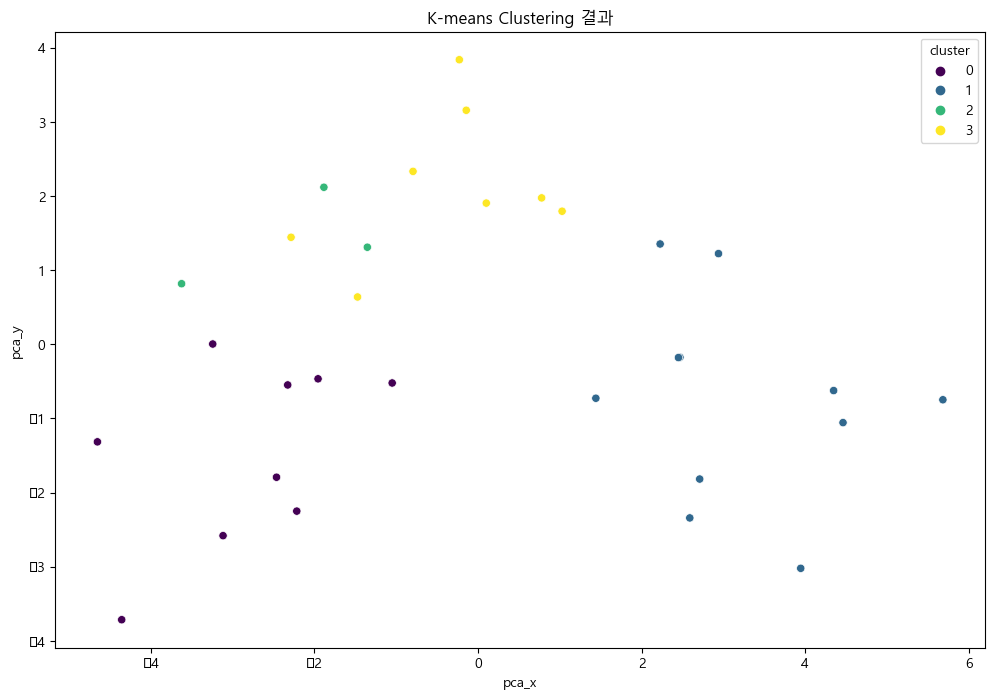

전체 실루엣 계수: 0.29
Cluster 0의 평균 실루엣 계수: 0.23
Cluster 1의 평균 실루엣 계수: 0.33
Cluster 2의 평균 실루엣 계수: 0.13
Cluster 3의 평균 실루엣 계수: 0.34


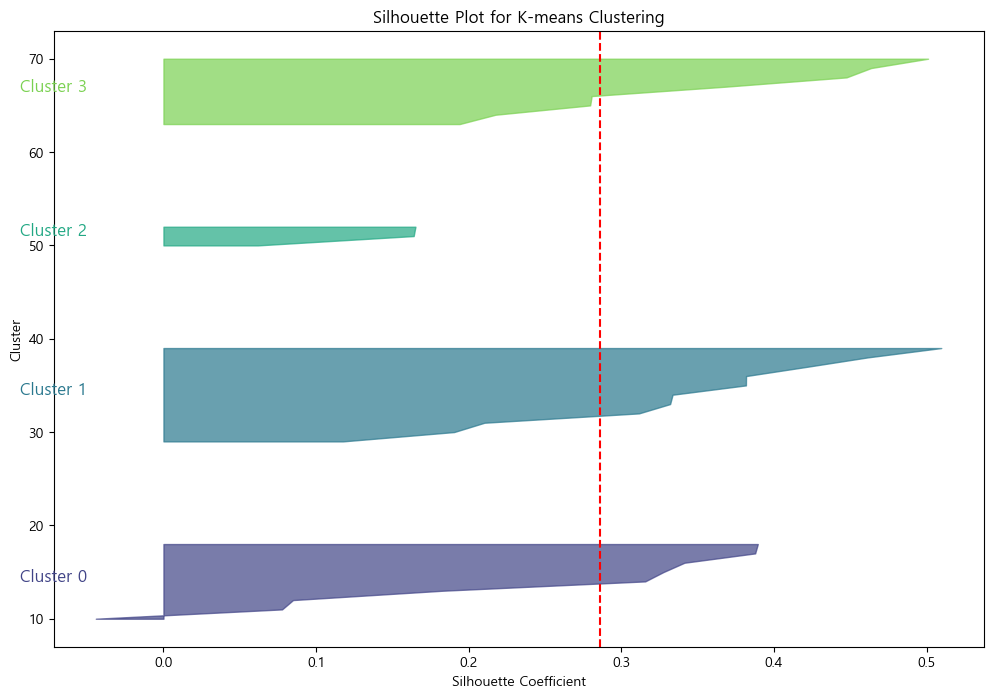

In [27]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 
pd.set_option('display.float_format', '{:,.2f}'.format)

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1.drop(columns='시군명'))

# 군집 개수 설정
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# 데이터에 군집 결과 추가
df1['cluster'] = clusters

# 각 군집에 속한 시군명을 집계
cluster_groups = df1.groupby('cluster')['시군명'].apply(list)

# 군집별로 시군명을 출력
print("각 군집에 속한 시군명:")
for cluster, cities in cluster_groups.items():
    print(f"Cluster {cluster}: {', '.join(cities)}")

# PCA를 통한 시각화
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df1['pca_x'] = principal_components[:, 0]
df1['pca_y'] = principal_components[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca_x', y='pca_y', hue='cluster', data=df1, palette='viridis')
plt.title('K-means Clustering 결과')
plt.show()

# 실루엣 계수 계산
silhouette_vals = silhouette_samples(scaled_features, clusters)
silhouette_avg = silhouette_score(scaled_features, clusters)

# 실루엣 계수 출력
print(f'전체 실루엣 계수: {silhouette_avg:.2f}')
for cluster in range(n_clusters):
    cluster_silhouette_avg = silhouette_vals[clusters == cluster].mean()
    print(f'Cluster {cluster}의 평균 실루엣 계수: {cluster_silhouette_avg:.2f}')

# 군집별 실루엣 계수 플롯
fig, ax = plt.subplots(figsize=(12, 8))
y_lower = 10
for cluster in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[clusters == cluster]
    cluster_silhouette_vals.sort()
    
    size = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size
    color = sns.color_palette('viridis', n_colors=n_clusters)[cluster]
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, (y_lower + y_upper) / 2, f'Cluster {cluster}', va='center', ha='right', color=color, fontsize=12)
    y_lower = y_upper + 10

ax.axvline(x=np.mean(silhouette_vals), color='red', linestyle='--')
ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster')
ax.set_title('Silhouette Plot for K-means Clustering')
plt.show()

C:\Users\home\AppData\Local\Temp\ipykernel_25996\1651838146.py:43: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\Users\home\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


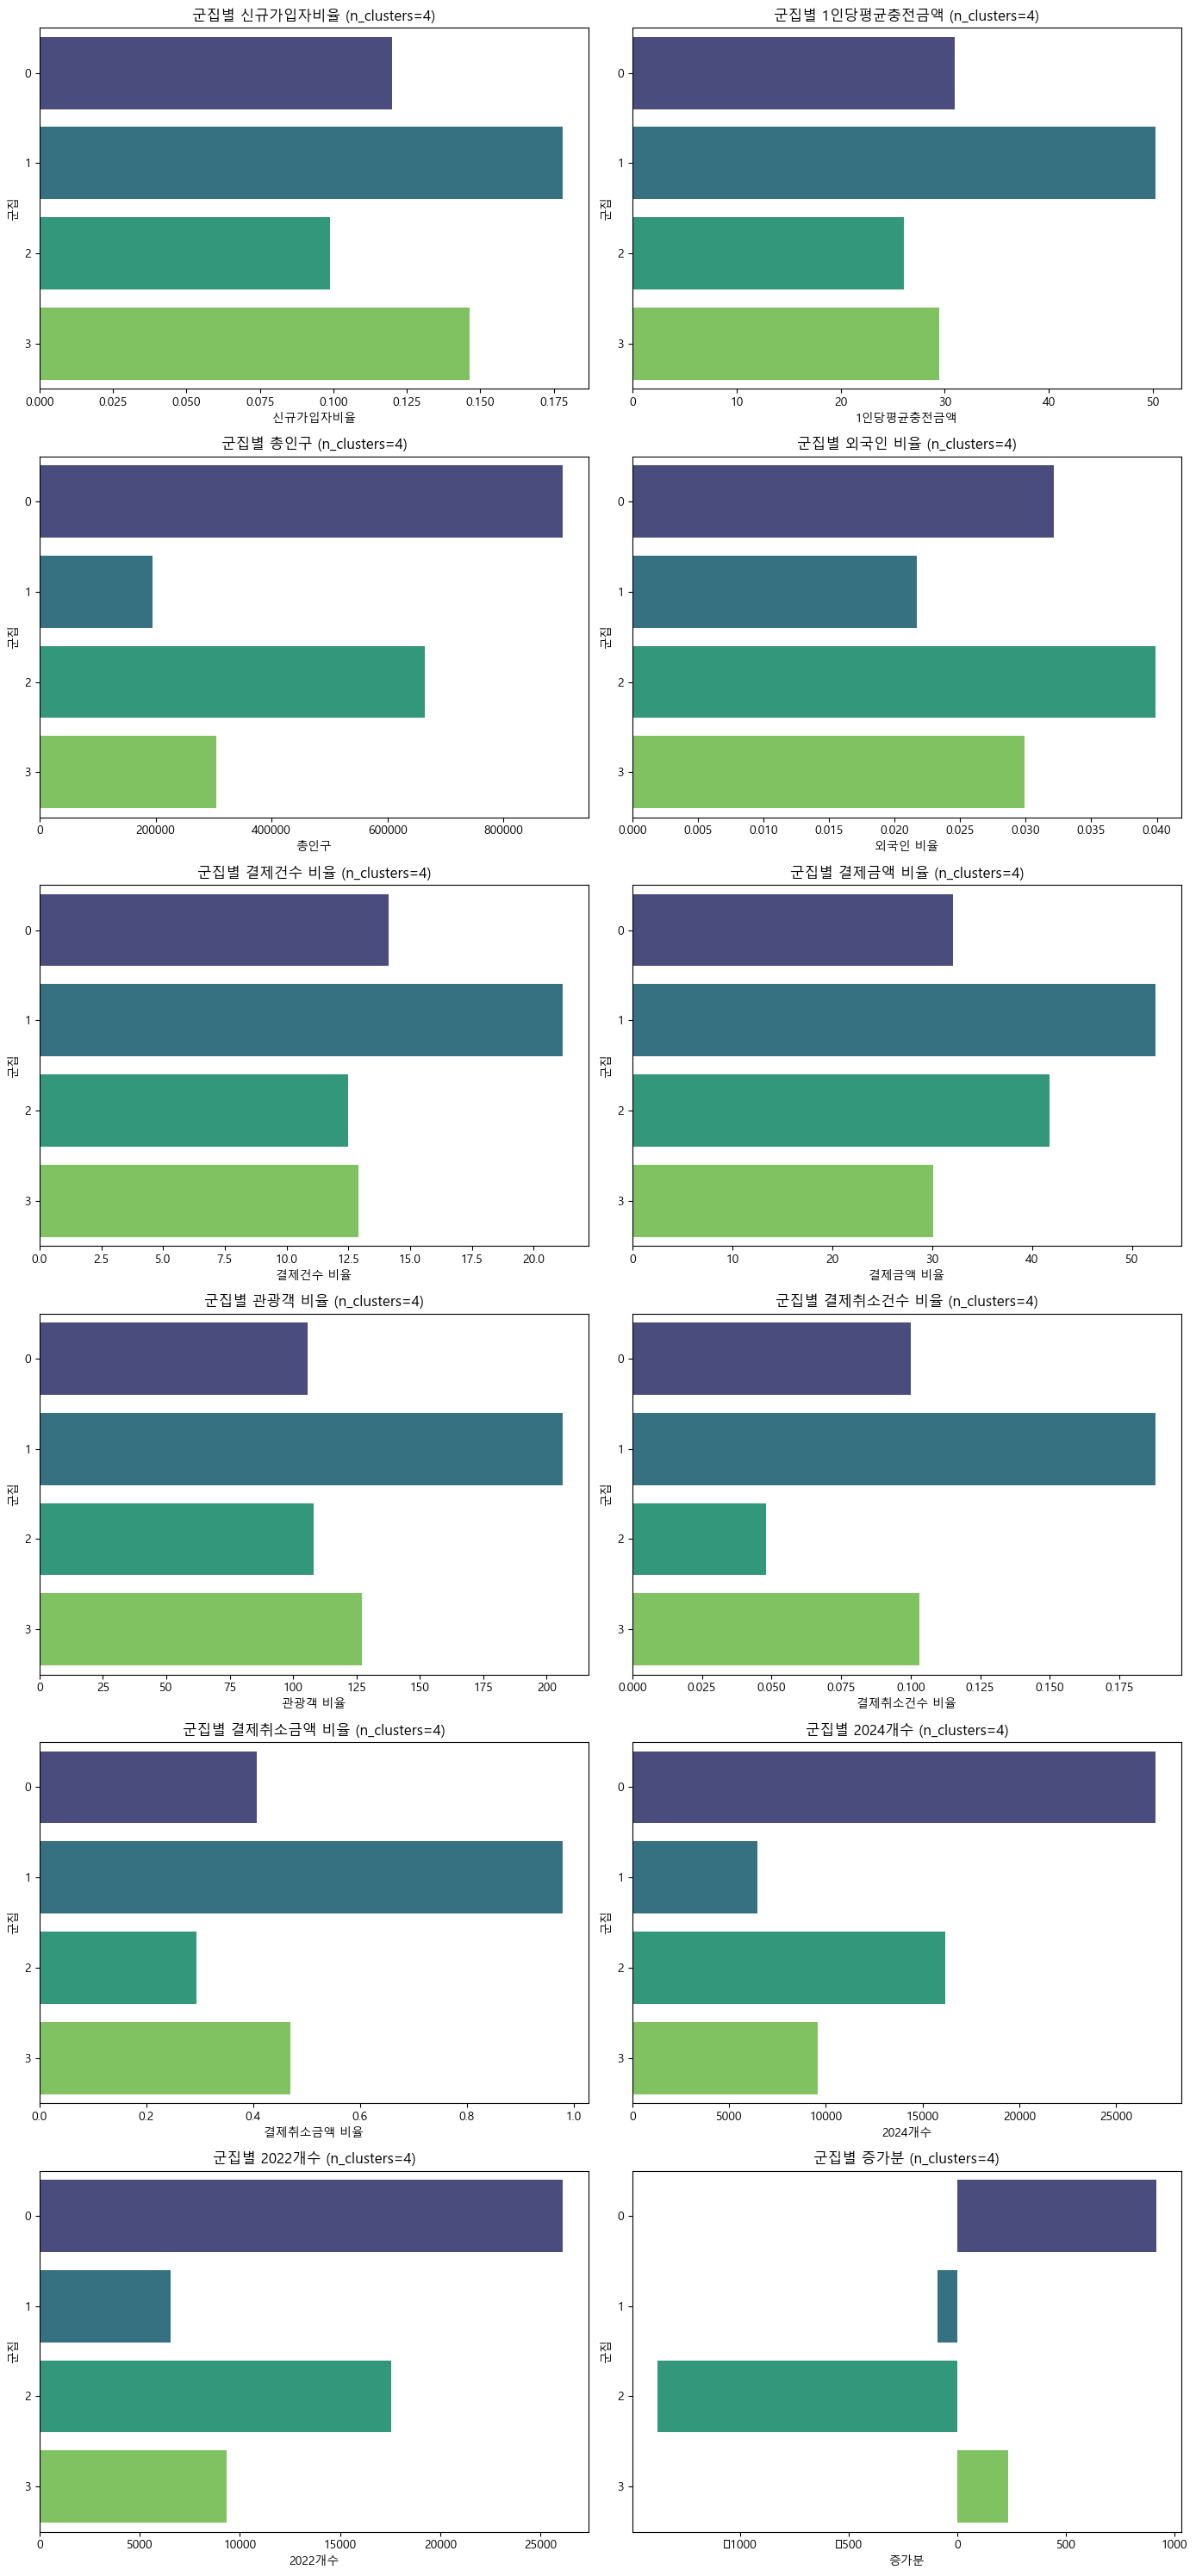

In [34]:
# 시각화할 데이터와 플롯의 개수
plot_titles = [
    '신규가입자비율',	
    '1인당평균충전금액',
    '총인구',
    '외국인 비율',
    '결제건수 비율',
    '결제금액 비율',
    '관광객 비율',
    '결제취소건수 비율', 
    '결제취소금액 비율',
    '2024개수',
    '2022개수',
    '증가분'
]

# 군집별 특징 시각화 함수
def plot_cluster_characteristics(df1, n_clusters):
    num_plots = len(plot_titles)
    ncols = 2  # 2열로 설정
    nrows = (num_plots + ncols - 1) // ncols  # 행 개수 계산

    # 서브플롯 생성
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 5 * nrows))
    axs = axs.flatten()  # axs를 1D 배열로 평탄화

    # 서브플롯 데이터와 그래프 그리기
    for i, title in enumerate(plot_titles):
        if i >= len(axs):  # 서브플롯이 부족할 경우
            break
        ax = axs[i]
        
        # 군집별로 해당 데이터의 평균 계산
        cluster_data = df1.groupby('cluster')[title].mean().reset_index()
        
        # 가로 막대 그래프 시각화
        sns.barplot(x=title, y='cluster', data=cluster_data, palette='viridis', ax=ax, orient='h')
        ax.set_title(f'군집별 {title} (n_clusters={n_clusters})')
        ax.set_xlabel(title)
        ax.set_ylabel('군집')

    # 레이아웃 조정
    plt.tight_layout()
    plt.show()

# 군집 개수 4에 대한 군집별 특징 시각화 호출
n_clusters = 4

# 데이터 표준화 및 K-means 군집화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1.drop(columns='시군명'))

kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

df1['cluster'] = clusters

# 군집별 특징 시각화
plot_cluster_characteristics(df1, n_clusters)